In [1]:
import time
import numpy as np
from IPython.display import display, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from hmmlearn import hmm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from  sklearn.metrics import mean_squared_error as mse
from astropy.io import fits
import matplotlib.pyplot as plt
import os, sys



import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    plt.figure(figsize=(30,10))
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

In [2]:
class_type = 'CANDIDATE'
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
#Clean Light Curves
lc_kepler = np.load(folder_lc+"cleaned/LC_kepler_processed.npy" )   
lc_kepler_times = np.load('/work/work_teamEXOPLANET/KOI_LC/npy/KOI_LC_time.npy')

In [3]:
#borrar nans... arreglo variable
X_lc = []
X_time = []
for i in range(lc_kepler_times.shape[0]):
    mask_nan_aux = np.isnan(lc_kepler[i])
    X_lc.append(lc_kepler[i][~mask_nan_aux])
    X_time.append(lc_kepler_times[i][~mask_nan_aux])
    
X_lc = np.asarray(X_lc)
X_time = np.asarray(X_time)

In [4]:
X_lc.shape

(8054,)

In [5]:
X_time.shape

(8054,)

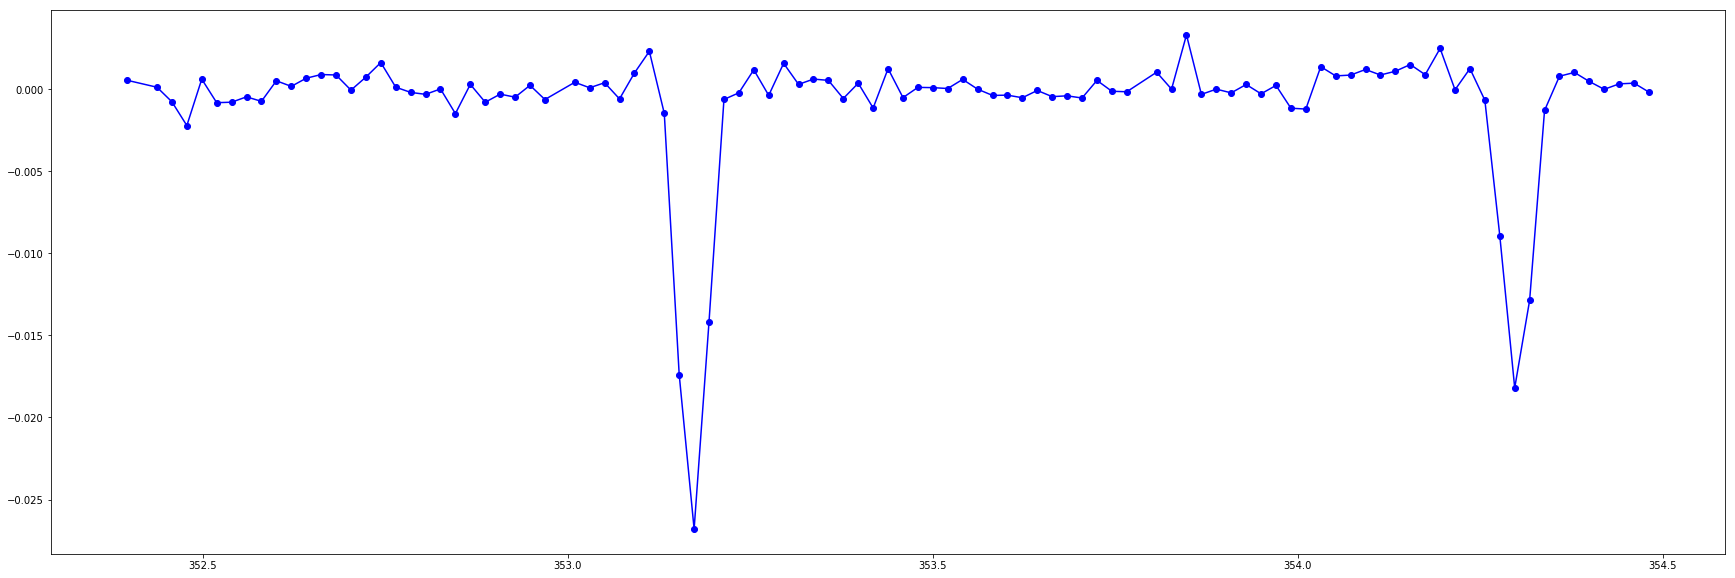

In [6]:
indice = 17

plt.figure(figsize=(30,10))
plt.plot(X_time[indice][:100],X_lc[indice][0:100],'bo-')
plt.show()

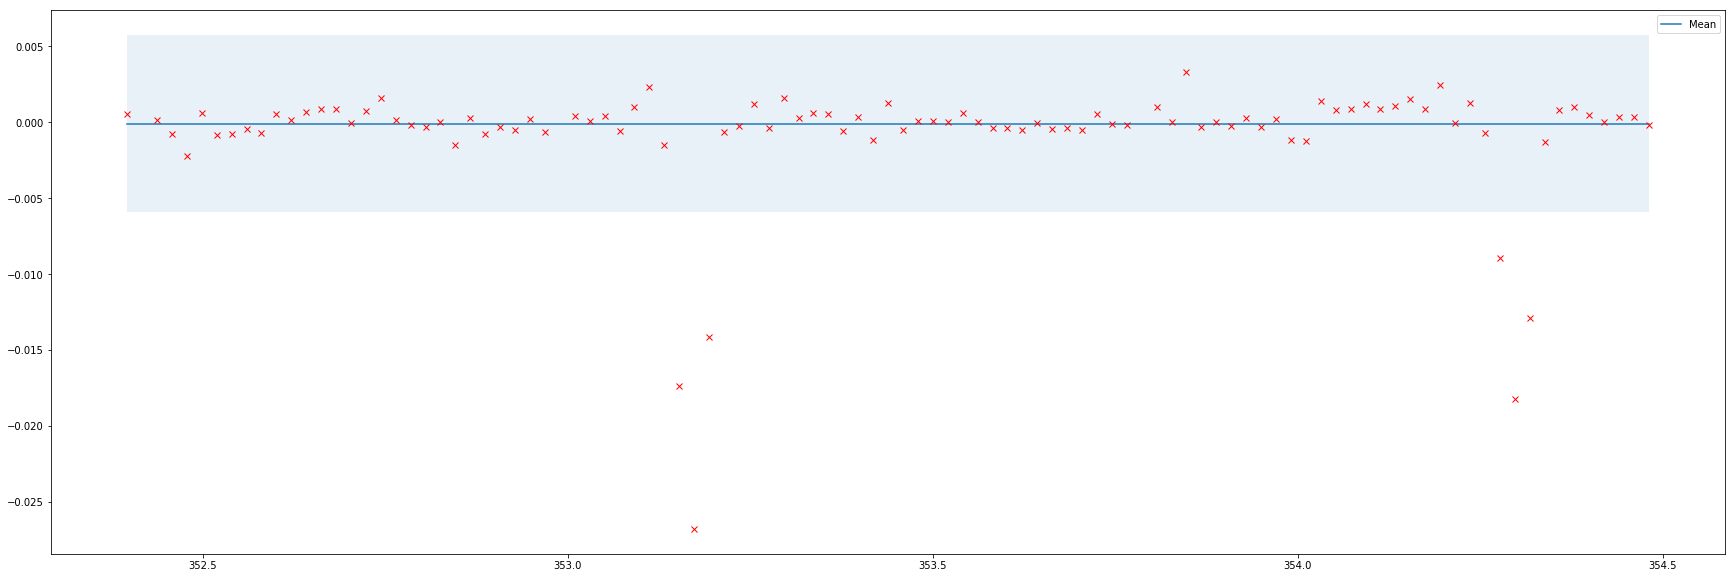

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.008)

gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_time[indice][:100].reshape(-1, 1), return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

# Compare with previous results
#assert(np.isclose(l_opt, l))
#assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results
plot_gp(mu_s, cov_s, X_time[indice][:100], X_train=X_time[indice][:100], Y_train=X_lc[indice][:100])


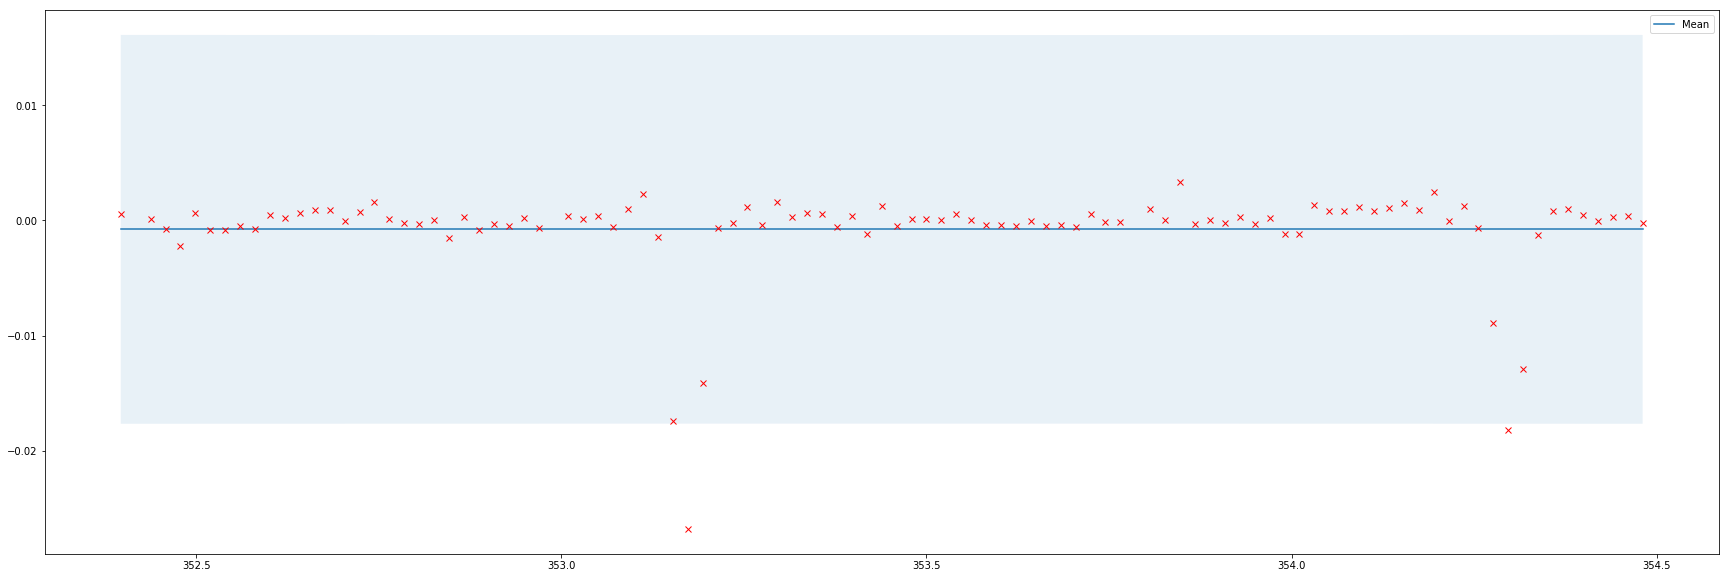

In [8]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.008)

gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_time[indice][:100].reshape(-1, 1), return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

# Compare with previous results
#assert(np.isclose(l_opt, l))
#assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results
plot_gp(mu_s, cov_s, X_time[indice][:100], X_train=X_time[indice][:100], Y_train=X_lc[indice][:100])


1**2 * RBF(length_scale=1)
1**2 * RationalQuadratic(alpha=0.1, length_scale=1)
1**2 * ExpSineSquared(length_scale=1, periodicity=3)
1**2 * Matern(length_scale=1, nu=1.5)


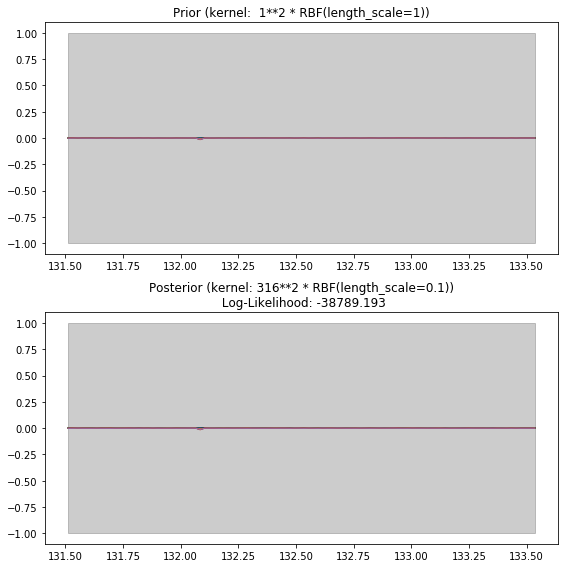

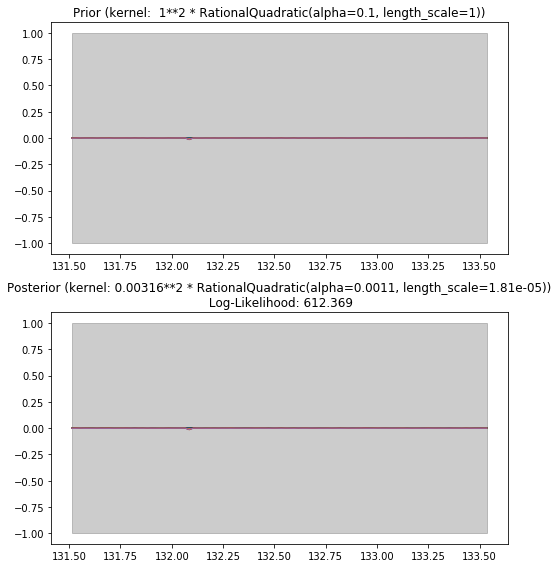

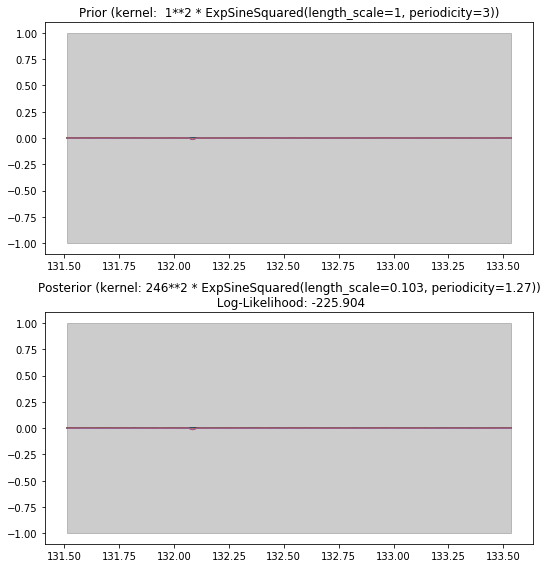

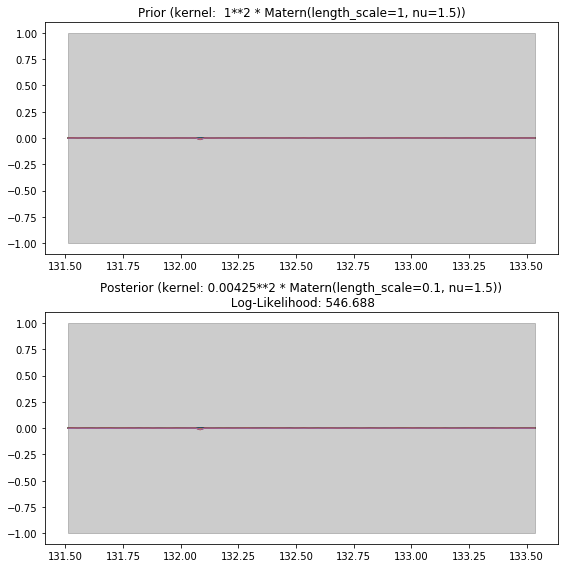

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           1.0 * Matern(length_scale=1.0, 
            length_scale_bounds=(1e-1, 10.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

# length_scale = 0.5

1**2 * RBF(length_scale=0.5)
1**2 * RationalQuadratic(alpha=0.1, length_scale=0.5)
1**2 * ExpSineSquared(length_scale=0.5, periodicity=3)


/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([    26.70843697,    158.32096386, -11269.91879177]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 7, 'warnflag': 2}
  ConvergenceWarning)


1**2 * Matern(length_scale=0.5, nu=1.5)


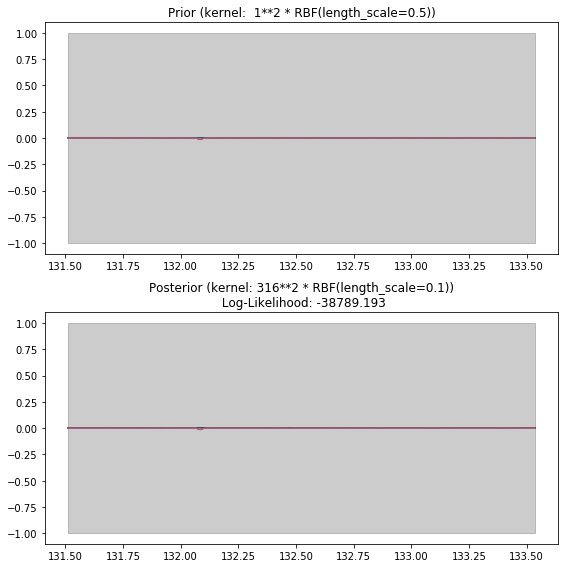

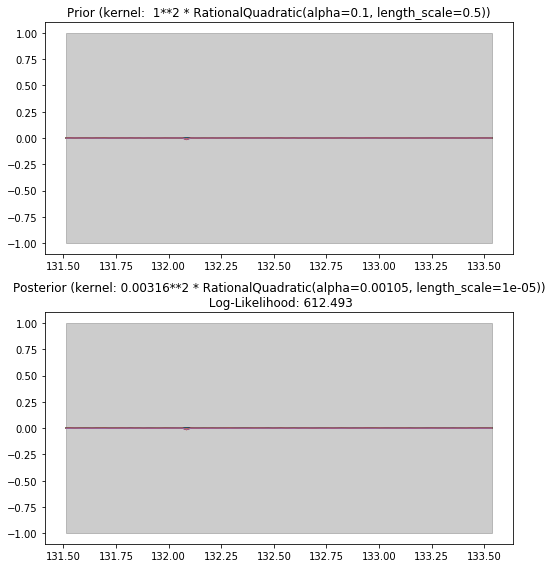

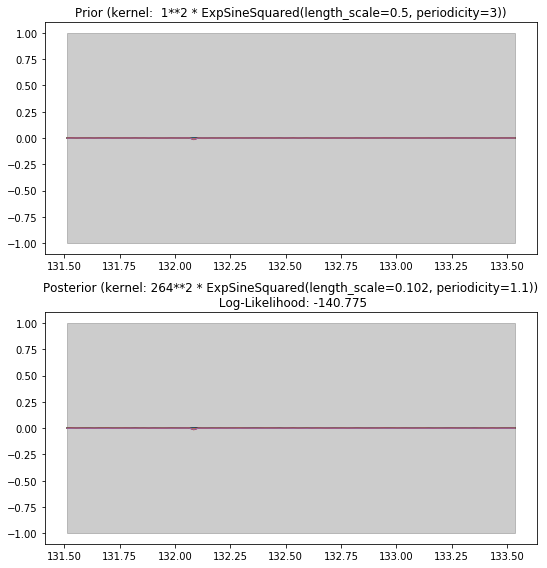

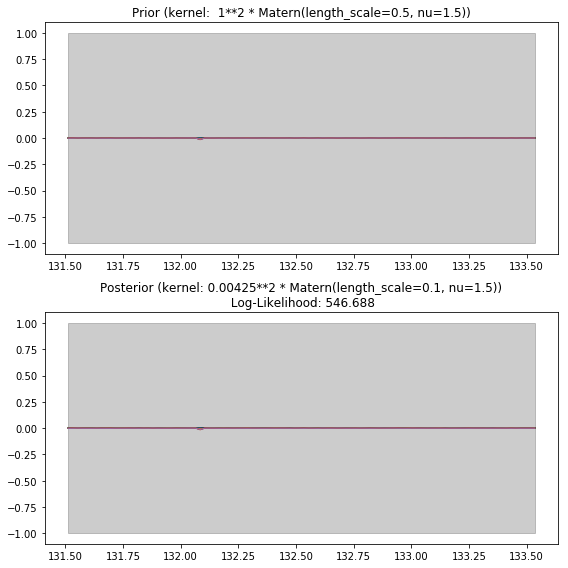

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=0.5, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=0.5, periodicity=3.0,length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           1.0 * Matern(length_scale=0.5, 
            length_scale_bounds=(1e-1, 10.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

1**2 * RBF(length_scale=0.05)
1**2 * RationalQuadratic(alpha=0.1, length_scale=0.05)
1**2 * ExpSineSquared(length_scale=0.05, periodicity=3)
1**2 * Matern(length_scale=0.05, nu=1.5)


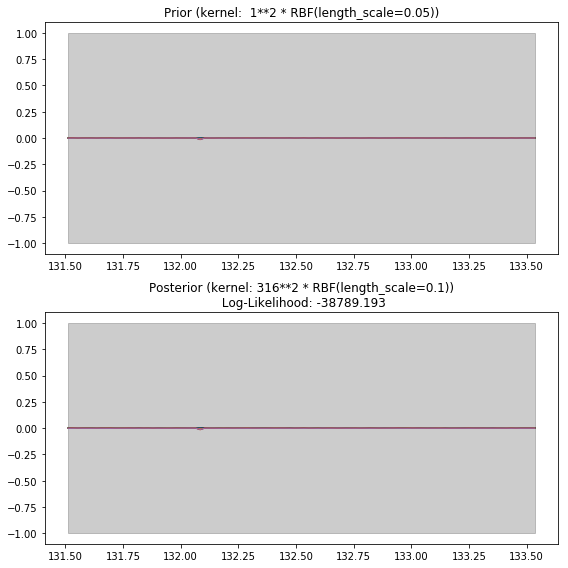

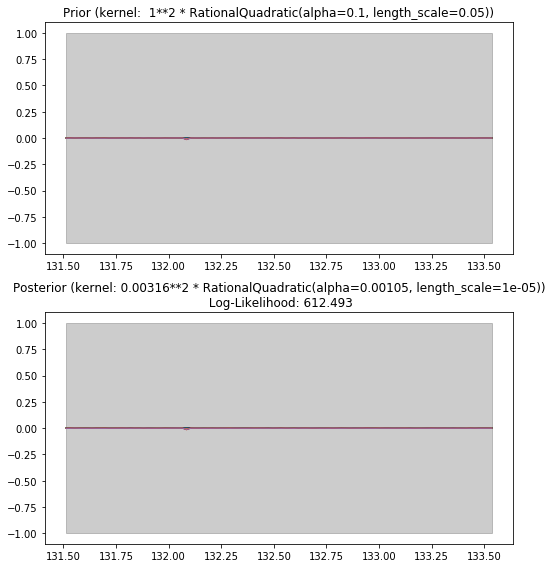

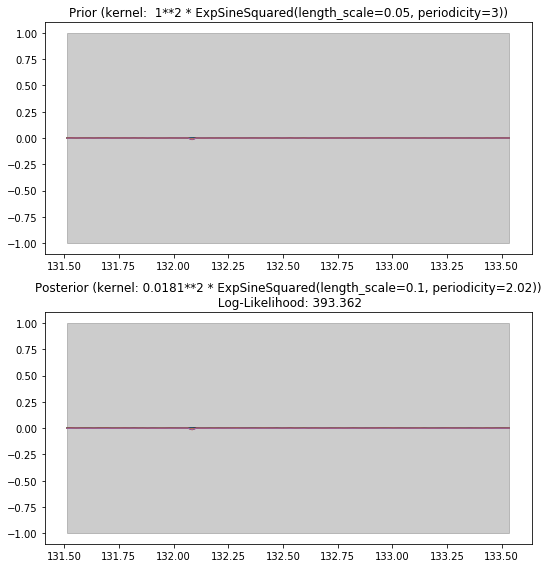

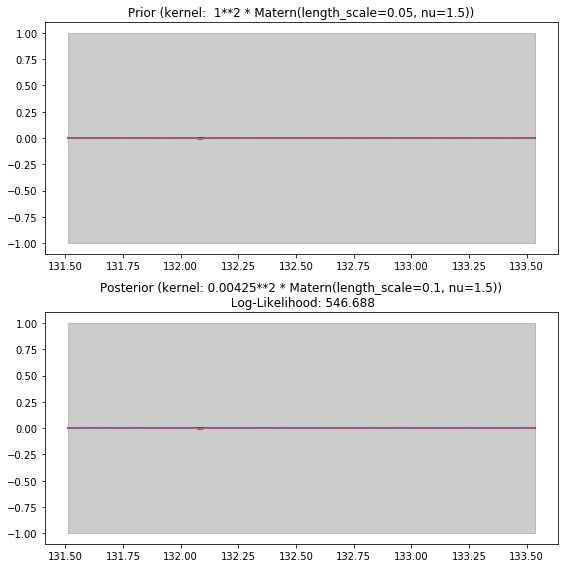

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=0.05, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=0.05, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=0.05, periodicity=3.0,length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           1.0 * Matern(length_scale=0.05, 
            length_scale_bounds=(1e-1, 10.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

1**2 * RBF(length_scale=1e-06)
1**2 * RationalQuadratic(alpha=0.1, length_scale=1e-06)
1**2 * ExpSineSquared(length_scale=1e-06, periodicity=3)
1**2 * Matern(length_scale=1e-06, nu=1.5)


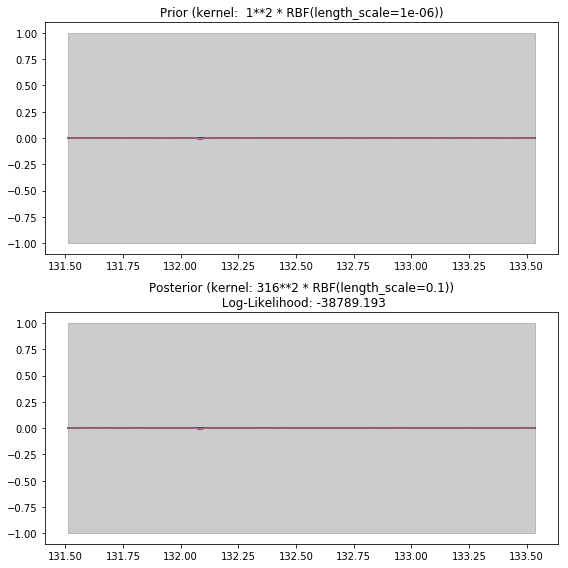

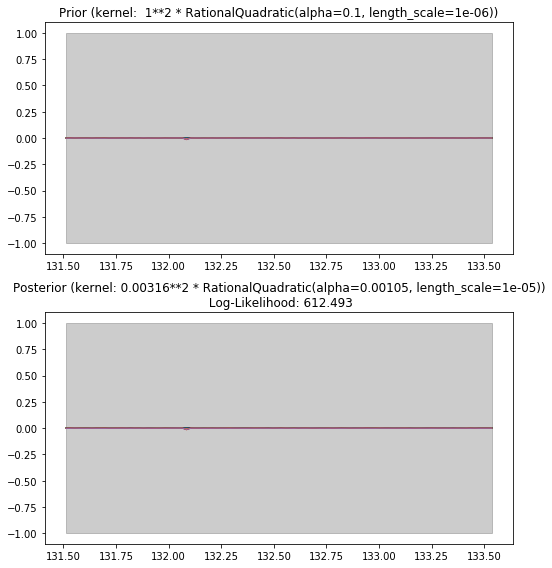

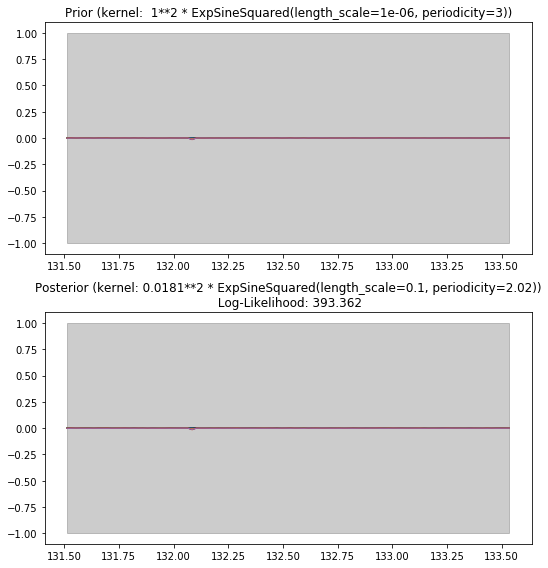

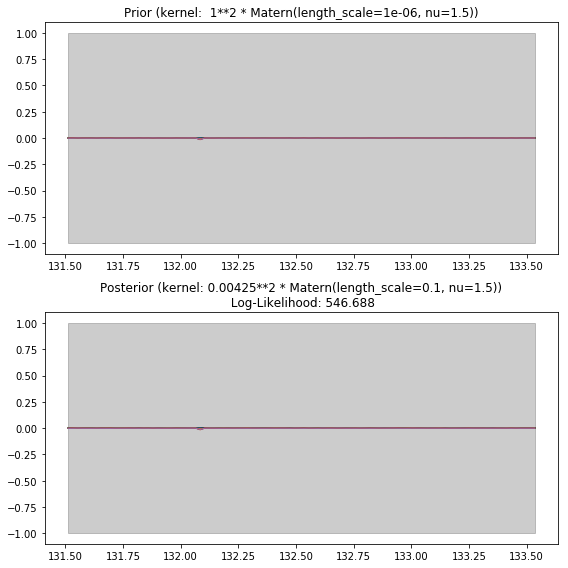

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=1e-6, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1e-6, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1e-6, periodicity=3.0,length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           1.0 * Matern(length_scale=1e-6, 
            length_scale_bounds=(1e-1, 10.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

1**2 * RBF(length_scale=25)
1**2 * RationalQuadratic(alpha=0.1, length_scale=25)
1**2 * ExpSineSquared(length_scale=25, periodicity=3)


/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.55016937e+01, 1.64731411e+02, 8.25962957e+05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 121, 'nit': 21, 'warnflag': 2}
  ConvergenceWarning)


1**2 * Matern(length_scale=25, nu=1.5)


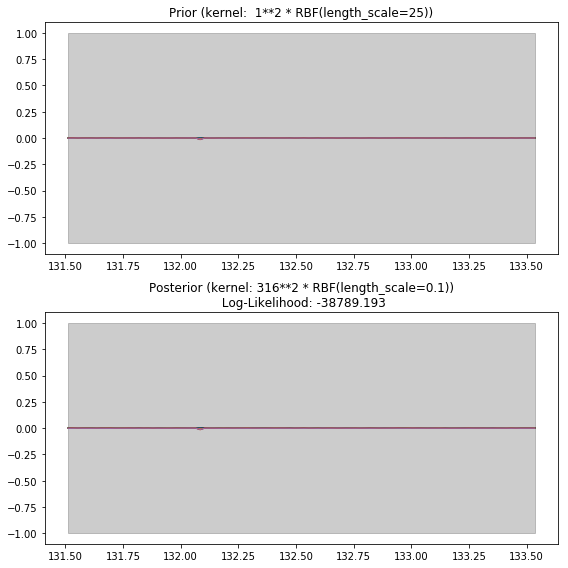

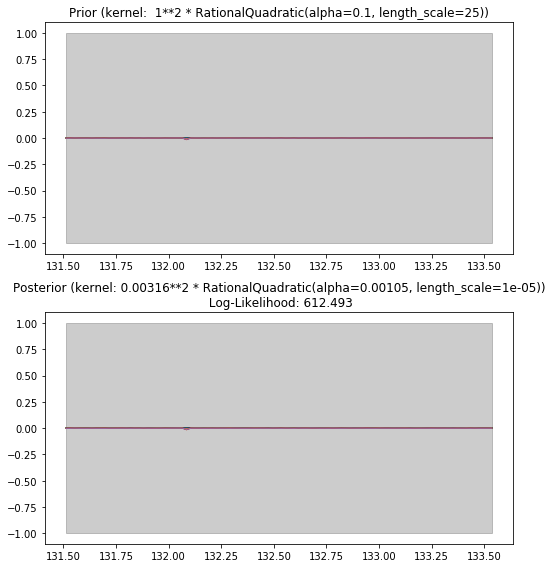

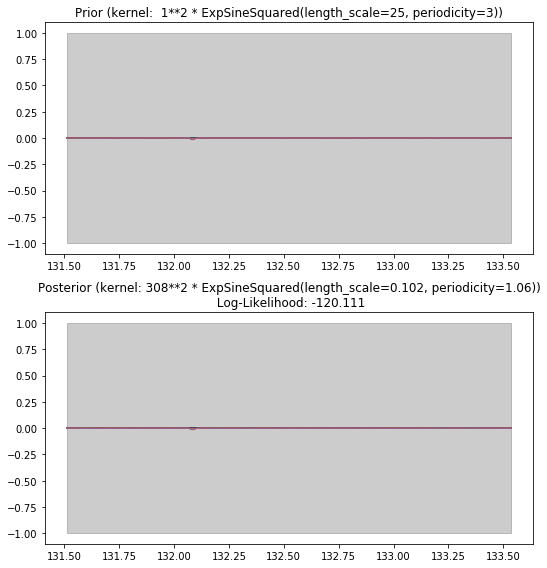

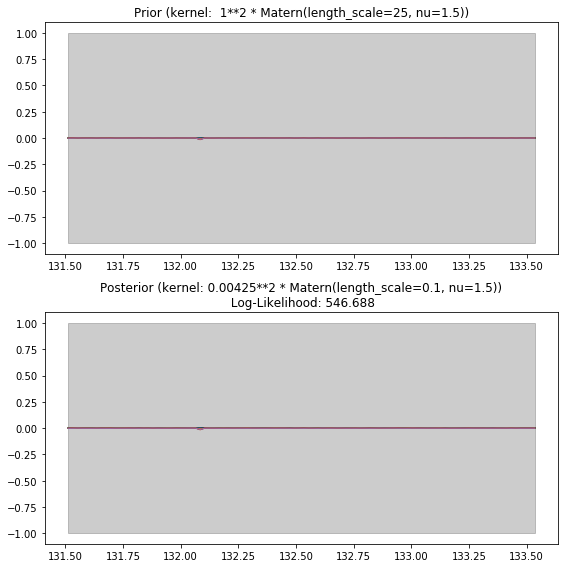

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=25, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=25, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=25, periodicity=3.0,length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           1.0 * Matern(length_scale=25, 
            length_scale_bounds=(1e-1, 10.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

1**2 * RBF(length_scale=0.001)
1**2 * RationalQuadratic(alpha=0.1, length_scale=0.001)
1**2 * ExpSineSquared(length_scale=0.001, periodicity=3)
1**2 * Matern(length_scale=0.001, nu=1.5)


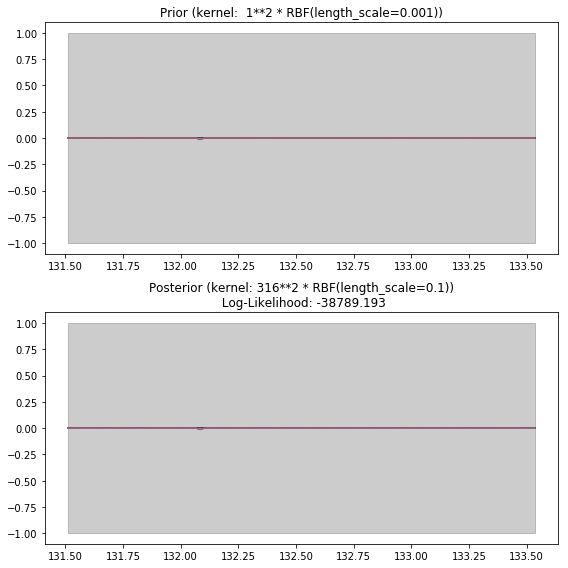

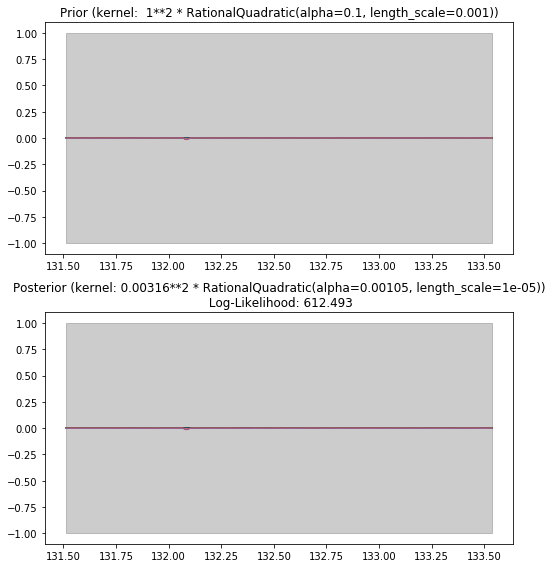

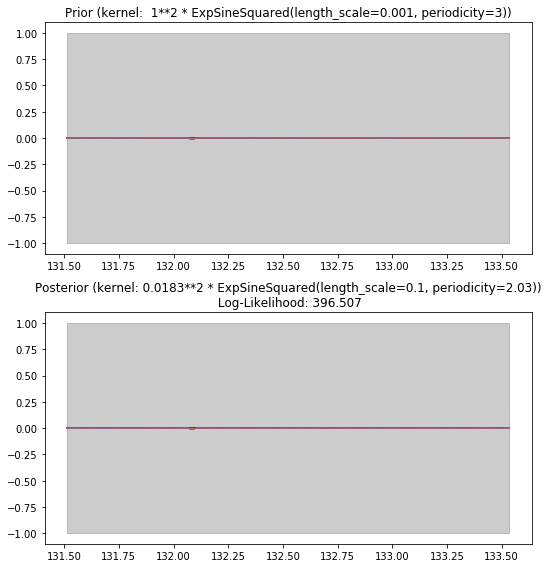

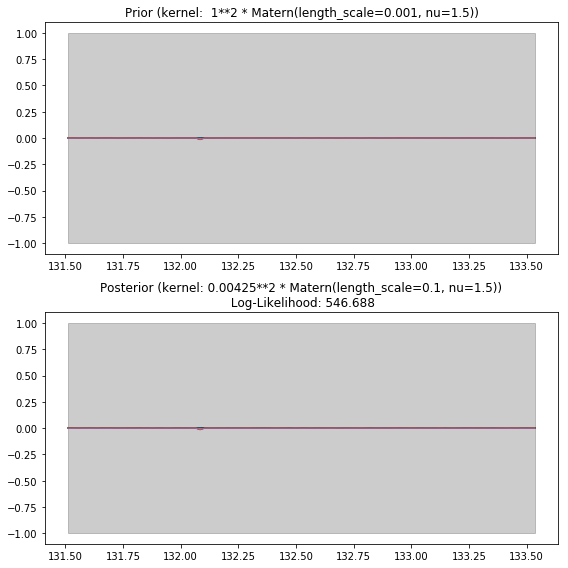

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=0.001, length_scale_bounds=(1e-1, 5.0)),
           1.0 * RationalQuadratic(length_scale=0.001, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=0.001, periodicity=3.0,length_scale_bounds=(0.1, 5.0),
                                periodicity_bounds=(1.0, 5.0)),
           1.0 * Matern(length_scale=0.001, 
            length_scale_bounds=(1e-1, 5.0),nu=1.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

1**2 * RBF(length_scale=0.001)
1**2 * RationalQuadratic(alpha=0.001, length_scale=0.001)


/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)


1**2 * ExpSineSquared(length_scale=0.001, periodicity=10)
1**2 * Matern(length_scale=0.001, nu=25.5)


/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)


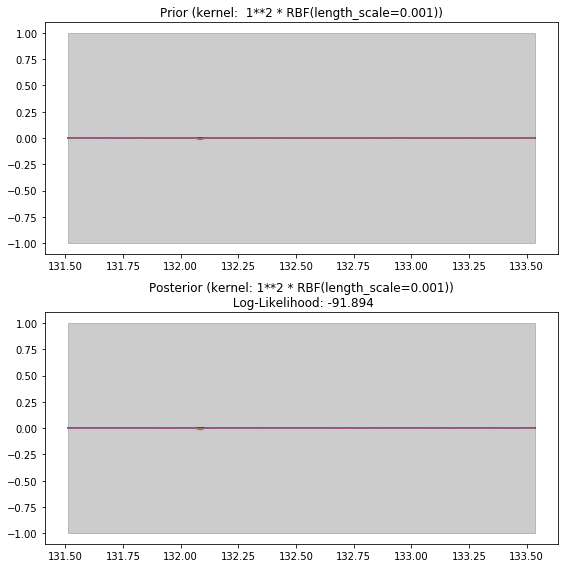

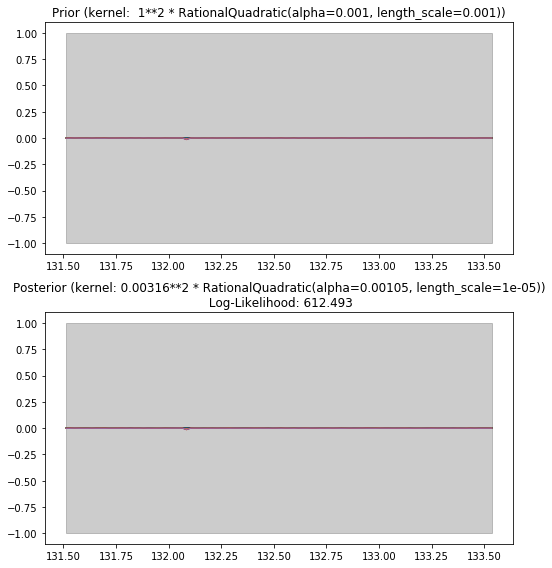

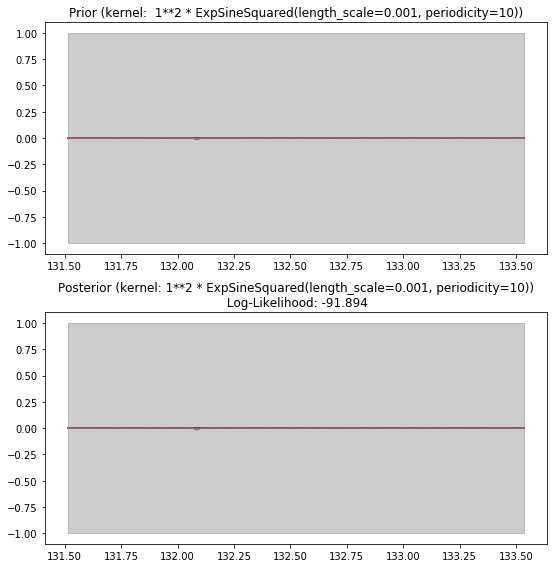

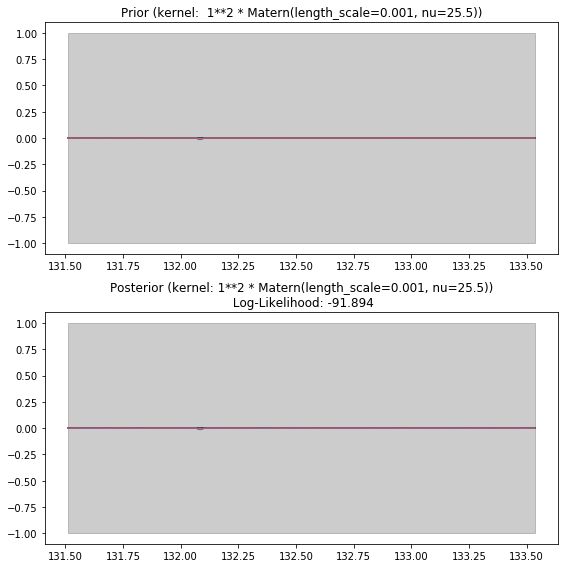

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel

indice = 0
cantidad_x = 100
cantidad_y = 500
n = 5
kernels = [1.0 * RBF(length_scale=0.001, length_scale_bounds=(1e-1, 0.01)),
           1.0 * RationalQuadratic(length_scale=0.001, alpha=0.001),
           1.0 * ExpSineSquared(length_scale=0.001, periodicity=10.0,length_scale_bounds=(0.001, 0.01),
                                periodicity_bounds=(25.0, 0.01)),
           1.0 * Matern(length_scale=0.001, 
            length_scale_bounds=(1e-1, 0.01),nu=25.5)]

    #gpr.fit(X_time[indice][:100].reshape(-1, 1),X_lc[indice][:100].reshape(-1, 1))

for kernel in kernels:
    print(str(kernel))
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = X_time[indice][:cantidad_x]    
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    #y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    y_samples = [X_lc[indice][:cantidad_y][i * n:(i + 1) * n] for i in range((len(X_lc[indice][:cantidad_y]) + n - 1) // n )]  
    plt.plot(X_, y_samples, lw=1)
    #plt.xlim(0, 100)
    #plt.ylim(-100, 100)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12) 
    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = X_time[indice][600:700]
    y = X_lc[indice][600:700]
    gp.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Plot posterior
    plt.subplot(2, 1, 2)
    plt.plot(X_, y_mean, 'k')
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,alpha=0.2, color='k')
    plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()